<a href="https://colab.research.google.com/github/Paradoxxs/Paradoxxs.github.io/blob/main/Iris_analysis_using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The iris data analysed using tensorflow.
Lets start by importing the libary we need to perform the analysis

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
#from tensorflow.keras import datasets, layers, models
#from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

Load the data set and import it into dataframe

In [37]:
df = sns.load_dataset("iris")

We can see in the graph the data is clearly sperated. 

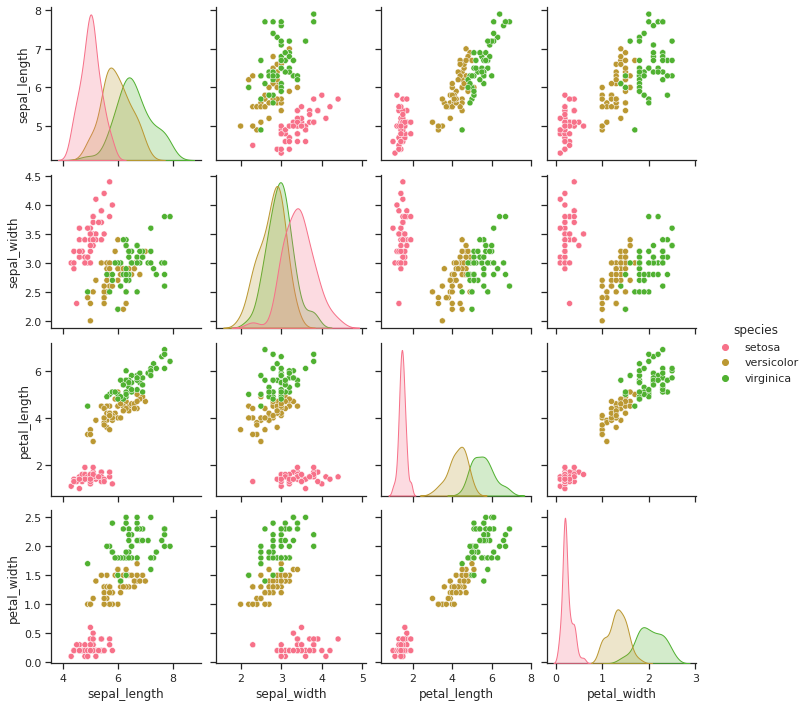

In [38]:
sns.set(style="ticks")
sns.set_palette("husl")
sns.pairplot(df.iloc[:,0:6], hue="species")

Split the data into x and y

In [39]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

print(X.shape)
print(y.shape)

(150, 4)
(150,)


Because tensorflow does not understand the label as string, we have to convert it into a vector model.

In [40]:
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

Split the data into train and test data with a test size of 20%

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state = 4)

In [45]:
model = tf.keras.Sequential(
    [
     layers.Dense(4,input_shape=(4,),activation='relu'),
     layers.Dense(3,activation='softmax')
    ])

model.compile(loss='mse', optimizer='adam')
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 15        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


Train the model

In [46]:
model.fit(x_train,y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 0.3975
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3893
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3790
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3689
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3604
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3587
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3611
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3611
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3590
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3578
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3575
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3575
Epoch 13/100
4/4 [==============================] - 0s 3ms/st

In [47]:
y_pred = model.predict(x_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

As you can see in the confusion matrix it not a perfect precisions of the pedels some of them got miss classified.

In [48]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.62      0.77        16
           1       0.33      0.80      0.47         5
           2       0.62      0.56      0.59         9

    accuracy                           0.63        30
   macro avg       0.65      0.66      0.61        30
weighted avg       0.78      0.63      0.67        30

[[10  4  2]
 [ 0  4  1]
 [ 0  4  5]]


Lets test the model aginst our own data
The expected result should look like this
<br>
0 = setosa 1 = versicolor 2 = virginica


In [49]:
X_test2 = np.array([[5.1, 3.0, 1.4, 0.2],[7,3.2,4.9,1.5],[5.9,3.0,5.1,2]])#setosa, versicolor, virginica
y_pred2 = model.predict(X_test2)
y_pred2

array([[0.38907152, 0.37413585, 0.23679265],
       [0.20330702, 0.48684758, 0.30984536],
       [0.18420696, 0.24002235, 0.57577074]], dtype=float32)

In [50]:
print(np.argmax(y_pred2,axis=1))

[0 1 2]
